In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
train = pd.read_csv("../data/titanic_train.csv")
test = pd.read_csv("../data/titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()  #check for null values, these need to be removed 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

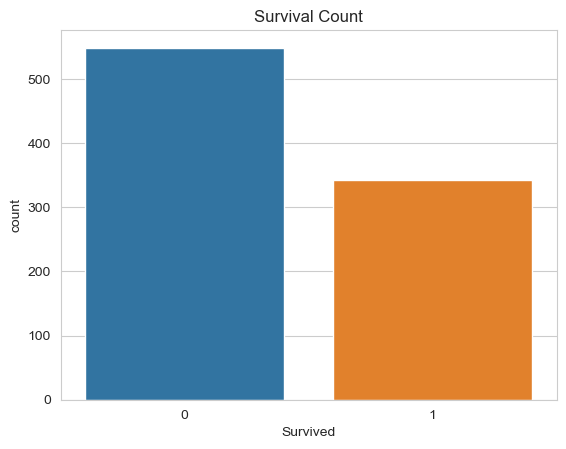

In [6]:
sns.countplot(data=train, x = "Survived")
plt.title("Survival Count")
plt.show()

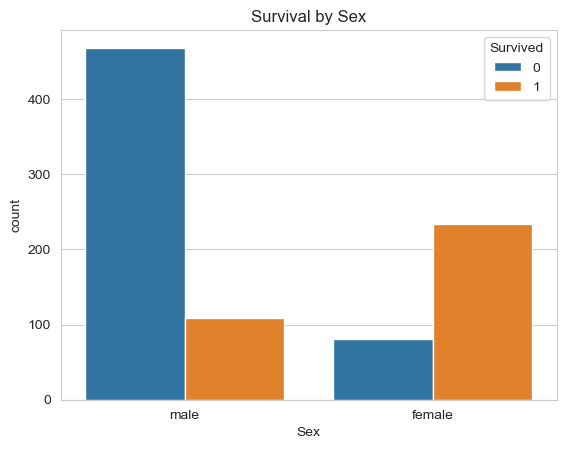

In [7]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()
#Females survived more since Females and Kids were escorted to safety first

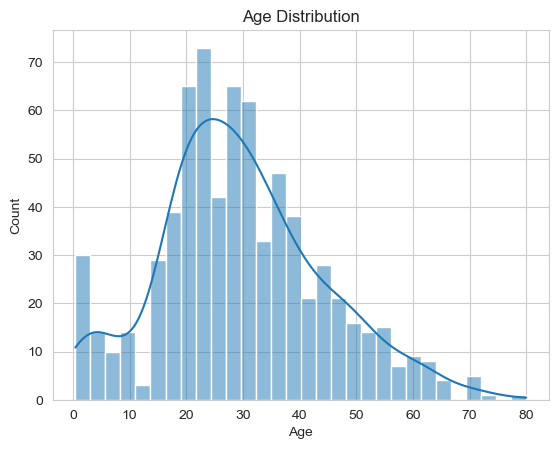

In [8]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [9]:
#we need to deal with the missing values in age
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(),inplace = True)

In [10]:
#Cabin has almost 75% missing values and hence needs to be dropped as it can't be used
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#Embarked has 2 missing values so we fill them with most frequent Embarked location
train['Embarked'].fillna(train['Embarked'].mode, inplace = True)

In [13]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [14]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [15]:
#remove unnecessary columns
train.drop(columns = ['Name','Ticket','PassengerId'],inplace = True)
test_passenger_ids = test['PassengerId']
test.drop(columns = ['Name','Ticket','PassengerId'],inplace = True)

In [16]:
#now that data is clean, we can move to converting non-numeric values to numeric
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [17]:
#now that data is clean and ready, we'll split our input and output
X = train.drop('Survived', axis=1)
y = train['Survived']

In [18]:
#making columns of both datasets same
test = test.reindex(columns = X.columns, fill_value = 0)
print(list(X.columns)==list(test.columns))

True


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#val variables for validation on training data - 80/20 split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 19)

In [21]:
#training a Log. Regression model - simple and basic, can be improved in further iterations
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
#checking accuracy of our model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation accuracy: ", accuracy)

Validation accuracy:  0.8491620111731844


In [23]:
#now we can apply model on test data
#print(test.dtypes)
test_preds = model.predict(test)

In [25]:
print(test_preds[:10])
print(len(test_preds))

[0 0 0 0 1 0 1 0 1 0]
418


In [26]:
#generating output as is required for submission 
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_preds
})

In [27]:
#exporting data to csv file as required
submission.to_csv('Submission.csv',index = False)

In [28]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
